In [87]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [88]:
#aggregate probabilities to the nearest 1/bucketCount 
bucketCount = 100
#input predicted probabilty in units per bucketCount
PREDICTION = 50
#input string of independent binary observations of variable
EVENTS = "1110" 

In [89]:
a_dist = np.zeros(bucketCount,dtype=float)
a_dist.fill(1/bucketCount)
labels = np.arange(1,bucketCount+1) 

In [90]:
def posterior(a_prob, b_prob, ba_prob): #bayes theorem
  return ba_prob * a_prob / b_prob
def accuracy(a_dist, i):
  return a_dist[i-1] / a_dist.sum()

<BarContainer object of 100 artists>

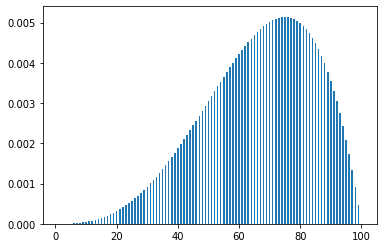

In [91]:
for event in EVENTS: #loop updating on each event
  ev = 0 #expected value of true probability of event (B) occuring
  for i in range(bucketCount):
    ev += ((i+1)/bucketCount) * a_dist[i] #i+1% * chance true probability is i+1%
  for i in range(bucketCount): #update each probability bin
    a_dist[i] = posterior(a_dist[i],ev,(int(event)*(i+1)/bucketCount)+(1-int(event))*(1-(i+1)/bucketCount)) #apply bayes
plt.bar(labels,a_dist,width=0.5)

In [92]:
print(accuracy(a_dist,PREDICTION) * bucketCount) #ratio of proportion of probability mass of prediction to uniform distribution expectation

1.2502083597252316
